In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,A_ID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,Outcome
0,T39591,B1,1.0,R,128.0,0,0,0,0,0,0,0,NaN,NaN,0,1.0,1,No
1,T4035,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,NaN,0,No
2,T62351,B2,1.0,R,NaN,0,0,0,0,0,0,0,NaN,NaN,0,NaN,0,No
3,T57874,NaN,NaN,R,NaN,0,0,0,0,0,0,0,NaN,NaN,0,NaN,1,Yes
4,T38960,B2,1.0,R,NaN,0,0,0,0,0,0,0,NaN,NaN,0,NaN,0,No


In [3]:
df['A4'].fillna(0,inplace=True)
df['A12'].fillna(0,inplace=True)
df['A13'].fillna(0,inplace=True)
df['A15'].fillna(0,inplace=True)
df['A2'].fillna(0,inplace=True)
df['A1'].fillna('No',inplace=True)
df['A3'].fillna('No',inplace=True)
df.head(11)

,A_ID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,Outcome
0,T39591,B1,1.0,R,128.0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,1,No
1,T4035,No,0.0,No,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,No
2,T62351,B2,1.0,R,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,No
3,T57874,No,0.0,R,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,1,Yes
4,T38960,B2,1.0,R,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,No
5,T39638,No,0.0,No,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,No
6,T36216,B2,2.0,R,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,No
7,T54491,No,0.0,No,26.0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,2,No
8,T38011,B2,1.0,S,0.0,184,0,13,0,0,0,0,0.0,0.0,1,0.0,0,No
9,T56654,B2,1.0,R,157.0,2703,124,269,2,1,0,0,0.0,0.0,4,3.0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A_ID     20000 non-null  object 
 1   A1       20000 non-null  object 
 2   A2       20000 non-null  float64
 3   A3       20000 non-null  object 
 4   A4       20000 non-null  float64
 5   A5       20000 non-null  int64  
 6   A6       20000 non-null  int64  
 7   A7       20000 non-null  int64  
 8   A8       20000 non-null  int64  
 9   A9       20000 non-null  int64  
 10  A10      20000 non-null  int64  
 11  A11      20000 non-null  int64  
 12  A12      20000 non-null  float64
 13  A13      20000 non-null  float64
 14  A14      20000 non-null  int64  
 15  A15      20000 non-null  float64
 16  A16      20000 non-null  int64  
 17  Outcome  20000 non-null  object 
dtypes: float64(5), int64(9), object(4)
memory usage: 2.7+ MB


In [5]:
df.isnull().sum()

A_ID       0
A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14        0
A15        0
A16        0
Outcome    0
dtype: int64

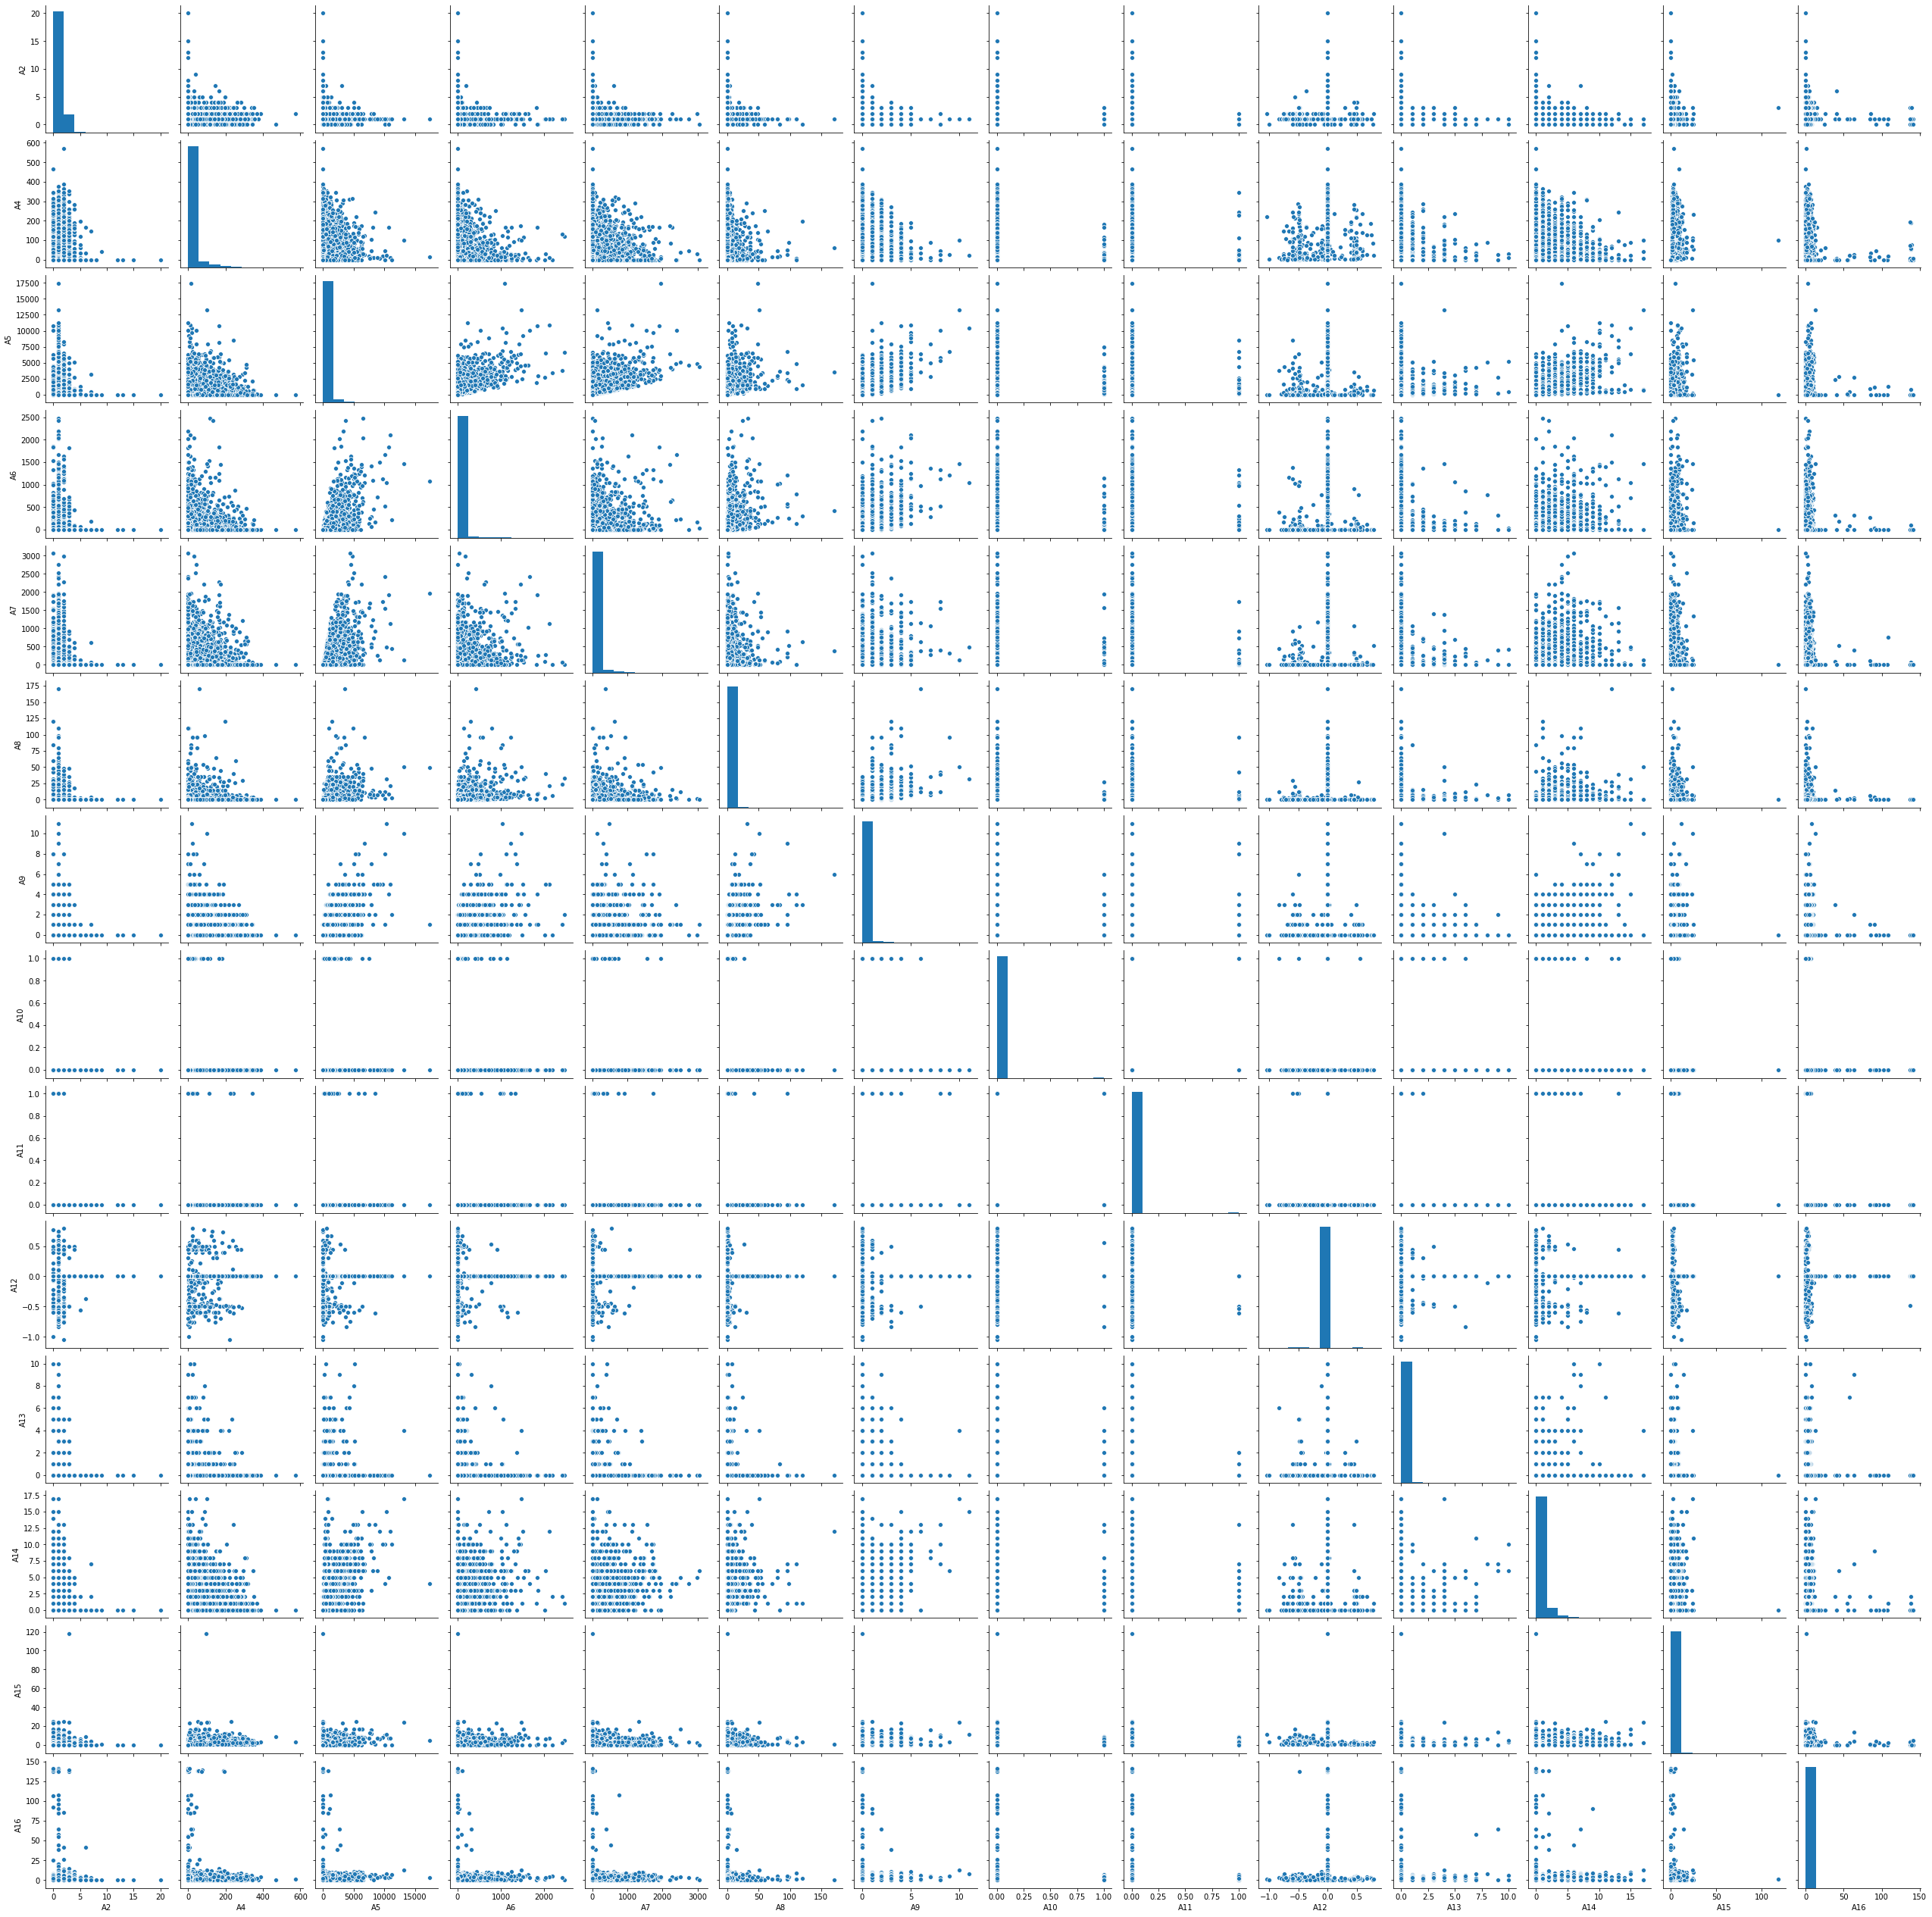

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,A2,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
A2,1.000000,0.163085,0.106953,0.063588,0.067436,0.041289,0.075914,0.016616,0.007396,-0.030399,0.031449,0.107918,0.139700,0.077985
A4,0.163085,1.000000,0.205473,0.112842,0.154179,0.104044,0.131613,0.009868,0.019917,-0.035772,0.037582,0.220188,0.420369,0.102207
A5,0.106953,0.205473,1.000000,0.678788,0.668311,0.474054,0.680875,0.086195,0.081966,-0.052025,0.125624,0.747023,0.351071,0.121464
A6,0.063588,0.112842,0.678788,1.000000,0.333136,0.489606,0.597452,0.075606,0.095559,-0.038203,0.067955,0.453414,0.253931,0.071879
A7,0.067436,0.154179,0.668311,0.333136,1.000000,0.250458,0.360651,0.042443,0.036772,-0.014992,0.041888,0.484624,0.197135,0.081250
A8,0.041289,0.104044,0.474054,0.489606,0.250458,1.000000,0.571243,0.030909,0.064064,-0.012950,0.045972,0.383953,0.203379,0.052900
A9,0.075914,0.131613,0.680875,0.597452,0.360651,0.571243,1.000000,0.078351,0.108794,-0.038513,0.088437,0.563383,0.288739,0.088428
A10,0.016616,0.009868,0.086195,0.075606,0.042443,0.030909,0.078351,1.000000,0.086529,-0.013149,0.056145,0.042909,0.028877,0.012192
A11,0.007396,0.019917,0.081966,0.095559,0.036772,0.064064,0.108794,0.086529,1.000000,-0.035406,0.016126,0.047170,0.034674,0.010698
A12,-0.030399,-0.035772,-0.052025,-0.038203,-0.014992,-0.012950,-0.038513,-0.013149,-0.035406,1.000000,-0.035500,-0.028045,-0.118505,-0.025322


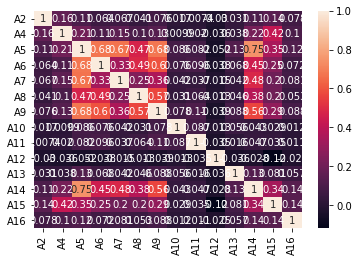

In [8]:
sns.heatmap(df.corr(),annot =True)
plt.rcParams['figure.figsize']=(20,8)

In [9]:
df.dtypes

A_ID        object
A1          object
A2         float64
A3          object
A4         float64
A5           int64
A6           int64
A7           int64
A8           int64
A9           int64
A10          int64
A11          int64
A12        float64
A13        float64
A14          int64
A15        float64
A16          int64
Outcome     object
dtype: object

In [10]:
df.drop('A_ID',axis=1,inplace =True)

In [11]:
df_new =pd.get_dummies(df,columns=['A1','A3'])

In [12]:
df_new.Outcome.replace(('Yes','No'),(1,0),inplace =True)

In [13]:
df_new.dtypes

A2         float64
A4         float64
A5           int64
A6           int64
A7           int64
A8           int64
A9           int64
A10          int64
A11          int64
A12        float64
A13        float64
A14          int64
A15        float64
A16          int64
Outcome      int64
A1_B1        uint8
A1_B2        uint8
A1_B3        uint8
A1_B4        uint8
A1_B5        uint8
A1_No        uint8
A3_A         uint8
A3_B         uint8
A3_C         uint8
A3_No        uint8
A3_P         uint8
A3_Q         uint8
A3_R         uint8
A3_S         uint8
dtype: object

In [14]:
df.A3.unique()

array(['R', 'No', 'S', 'Q', 'B', 'P', 'A', 'C'], dtype=object)

In [15]:
pd.crosstab(index=df['A3'],columns=df['Outcome'])

Outcome,No,Yes
A3,,
A,12,2
B,35,5
C,3,0
No,2467,470
P,32,19
Q,763,130
R,12671,1758
S,1430,203


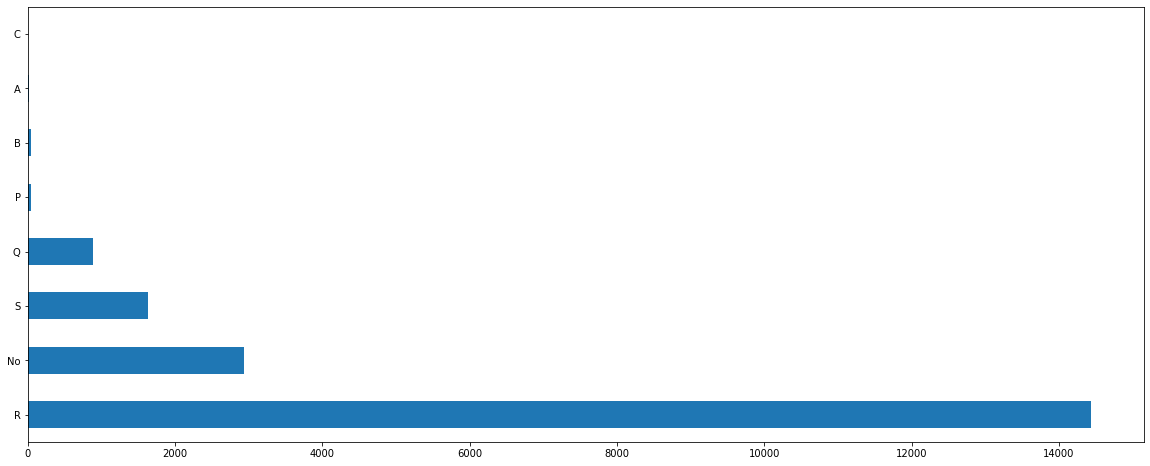

In [16]:
df.A3.value_counts().plot(kind='barh')

In [17]:
data_y=pd.DataFrame(df_new['Outcome'])
data_x =df_new.drop(['Outcome'],axis=1)
print(data_x.columns)
print(data_y.columns)

Index(['A2', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13',
       'A14', 'A15', 'A16', 'A1_B1', 'A1_B2', 'A1_B3', 'A1_B4', 'A1_B5',
       'A1_No', 'A3_A', 'A3_B', 'A3_C', 'A3_No', 'A3_P', 'A3_Q', 'A3_R',
       'A3_S'],
      dtype='object')
Index(['Outcome'], dtype='object')


In [18]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.6,random_state=2,stratify=data_y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 28)
(12000, 28)
(8000, 1)
(12000, 1)


In [19]:
clf = LogisticRegression()

In [20]:
clf.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = clf.predict(x_test)


In [22]:
accuracy_score(y_test,y_pred)

0.8681666666666666

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
y_test

,Outcome
14650,0
19598,0
11068,0
17982,0
11018,0
...,...
19314,1
6791,0
13747,0
16761,0
